This project aims to visualize time series data using a line chart, bar chart, and box plots, to visualize a dataset containing the number of page views each day on the freeCodeCamp.org forum from 2016-05-09 to 2019-12-03. The data visualizations will help the understanding of the patterns in visits and identify yearly and monthly growth.



In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
path = '/fcc-forum-pageviews.csv'
data = pd.read_csv(path, parse_dates = ['date'], index_col = 'date')

In [6]:
data.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [7]:
"""filtering out the visualizations tha are above the 97,5 percentile
and below 2,5 percentile"""
data = data[data['value']<=data['value'].quantile(0.975)]
data = data[data['value']>= data['value'].quantile(0.025)]

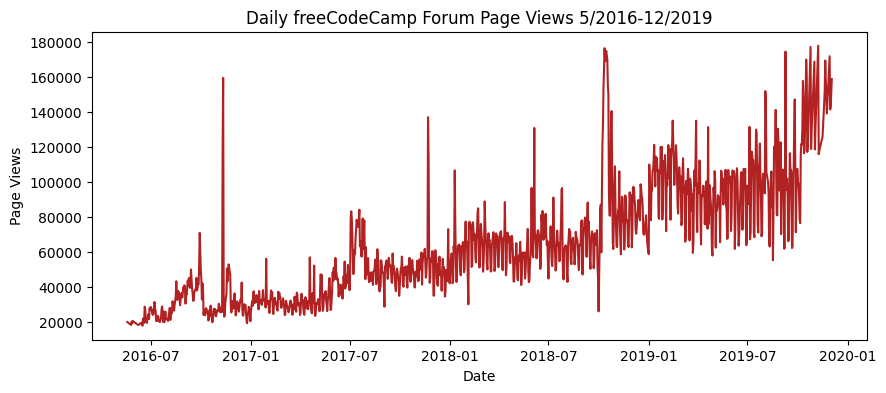

In [8]:
"""Creating a function tha draws a line chart"""
fig, ax = plt.subplots()
ax.plot(data.index, data['value'], color = 'firebrick')
ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
ax.set_xlabel('Date')
ax.set_ylabel('Page Views')
fig.set_size_inches(10,4)
plt.show()

In [9]:
#creating the month and year columns
data['Months'] = data.index.strftime('%B')
data['year'] = data.index.year
data.head()

,value,Months,year
date,,,
2016-05-19,19736,May,2016
2016-05-26,18060,May,2016
2016-05-27,19997,May,2016
2016-05-28,19044,May,2016
2016-05-29,20325,May,2016


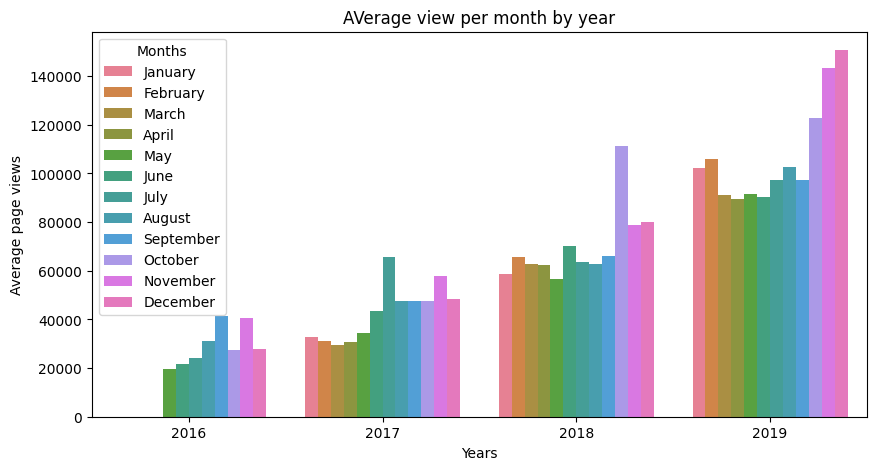

In [10]:
#Creating a Bar plot tha show the average view per month grouped by year
months_order = ['January','February','March','April','May','June','July','August','September','October','November','December']
fig2, ax2 = plt.subplots()
group = data.groupby(['year','Months'])['value'].agg(mean = 'mean')
g = sns.barplot(data = group, x = 'year', y = 'mean', hue = 'Months', hue_order= months_order)
g.set(xlabel = 'Years', ylabel = 'Average page views', title='AVerage view per month by year')
fig2.set_size_inches(10,5)
plt.show()

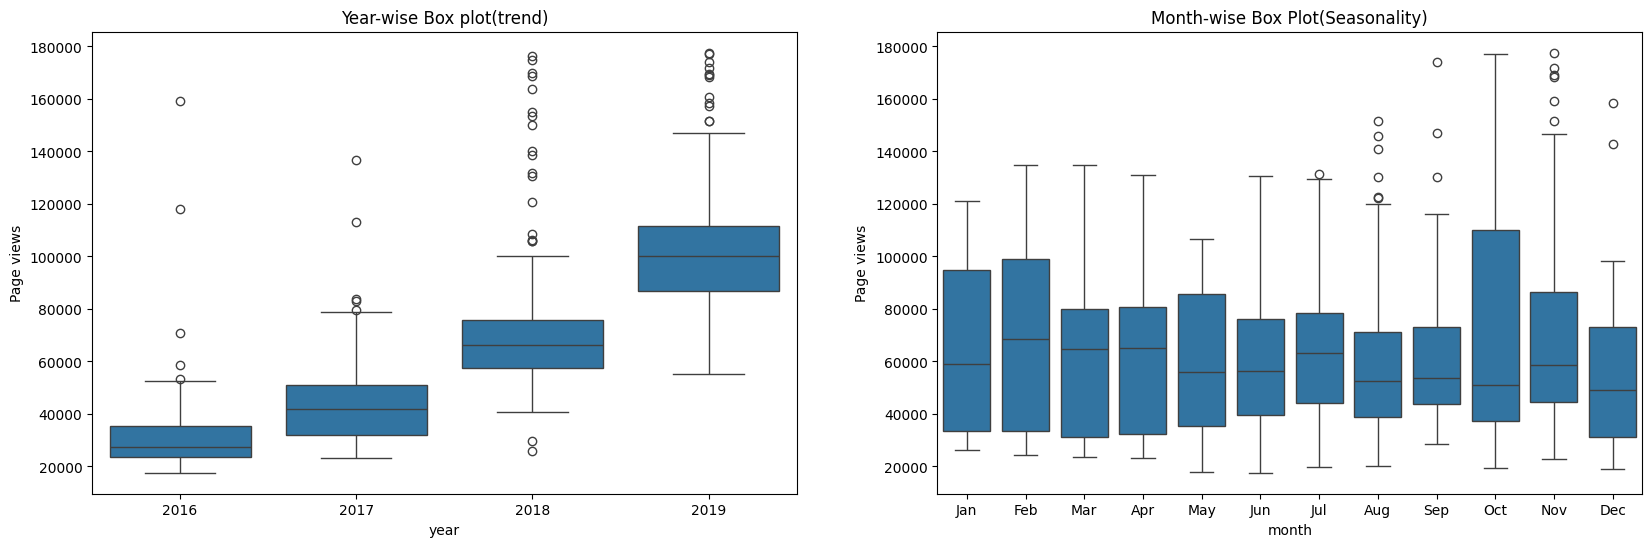

In [11]:
data['month'] = data.index.strftime('%b')
months_order2 = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
fig3, axes = plt.subplots(1,2)
sns.boxplot(x = 'month', y = 'value', data = data, order = months_order2, ax=axes[1])
sns.boxplot(x= 'year', y ='value',data = data, ax = axes[0])
sns.set_style('whitegrid')
fig3.set_size_inches(20,6)
axes[0].set_ylabel('Page views')
axes[1].set_ylabel('Page views')
axes[0].set_title('Year-wise Box plot(trend)')
axes[1].set_title('Month-wise Box Plot(Seasonality)')
plt.show()